In [1]:
import os
import numpy as np

import matplotlib
font = {'weight' : 'bold',
        'size'   : 13}

matplotlib.rc('font', **font)

import matplotlib.pyplot as plt # Plotting

from tifffile import imread

In [2]:
if not os.path.exists("../results"):
    os.mkdir("../results")

if not os.path.exists("../results/digital-twin"):
    os.mkdir("../results/digital-twin")

In [3]:
ref = imread("../data/Optimised-LSF-ref.tiff");
sim_no_noise = imread("../data/Optimised-LSF-sim-no-noise.tiff");
sim_noise = imread("../data/Optimised-LSF-sim-noise.tiff");

In [4]:
def plotInline(ref, sim, line_id, ylim, show_legend, fname, figsize=(9, 3)):
    
    fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    ax1.imshow(ref, cmap="gray", vmin=ylim[0], vmax=ylim[1])
    ax2.imshow(sim, cmap="gray", vmin=ylim[0], vmax=ylim[1])

    ax1.plot([0, ref.shape[1] - 1], [line_id, line_id], color="blue")
    ax2.plot([0, ref.shape[1] - 1], [line_id, line_id], color="orange")


    ax3.plot(ref[line_id], label="Experimental")
    ax3.plot(sim[line_id], label="Simulated")
    ax3.set_ylim(ylim)
    
    if show_legend:
        ax3.legend(prop={'size': 10})

    ax1.set_title("Experimental")
    ax2.set_title("Simulated")
    ax3.set_title("Intensity profiles")

    ax1.axis("off")
    ax2.axis("off")

    plt.tight_layout()

    plt.savefig(fname)
    plt.show()

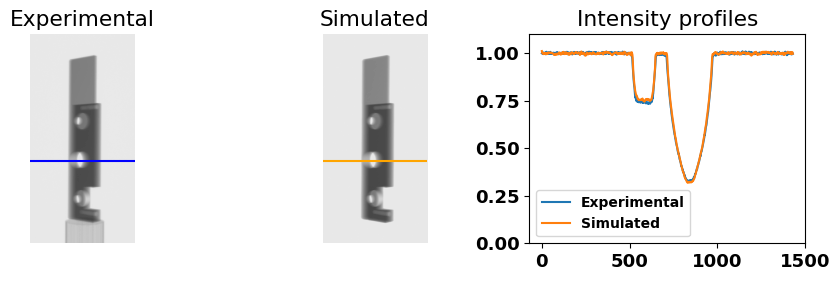

In [5]:
plotInline(imread("../data/Optimised-LSF-ref.tiff"),
           imread("../data/Optimised-LSF-sim-noise.tiff"),
           1744,
           (0,1.1),
           True,
           "../results/digital-twin/digital-twin-projections.pdf")

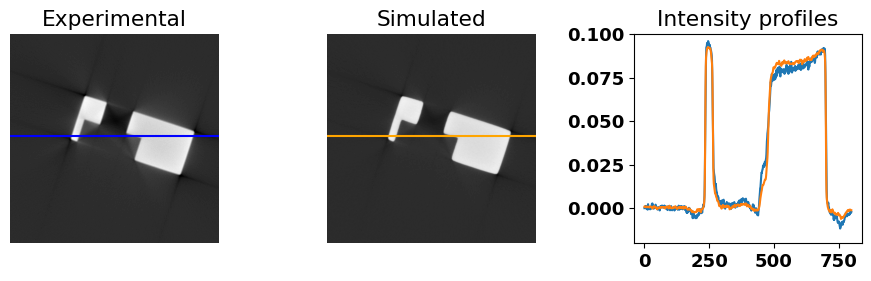

In [6]:
plotInline(imread("../data/experimental_idx_1490.tiff"),
           imread("../data/simulated_idx_1490.tiff"),
           390,
           (-0.02, 0.1),
           False,
           "../results/digital-twin/digital-twin-slices.pdf")